# Multivariate: Copulas

## Import libraries

In [1]:
import xarray as xr
import seaborn as sns
import pyvinecopulib as pv
import synthia as syn
from scipy.stats import multivariate_normal
import warnings
warnings.filterwarnings('ignore')

## Create a sample dataset with n samples

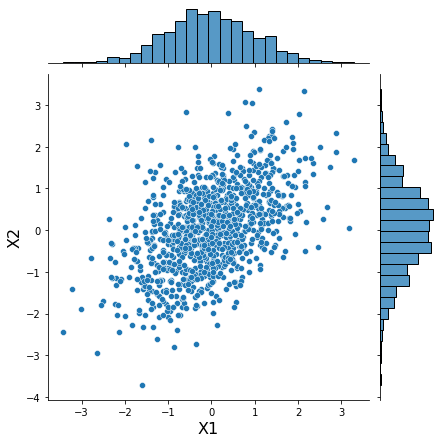

In [2]:
N_SAMPLES = 1000
mvnorm = multivariate_normal(mean=[0, 0], cov=[[1, 0.5],
                                               [0.5, 1]])
# Generate random samples from multivariate normal with correlation .5
data = xr.DataArray(mvnorm.rvs(N_SAMPLES))

h = sns.jointplot(data[:, 0], data[:, 1], kind='scatter')
h.set_axis_labels('X1', 'X2', fontsize=16);

## Fit a Gaussian copula with Synthia's backend

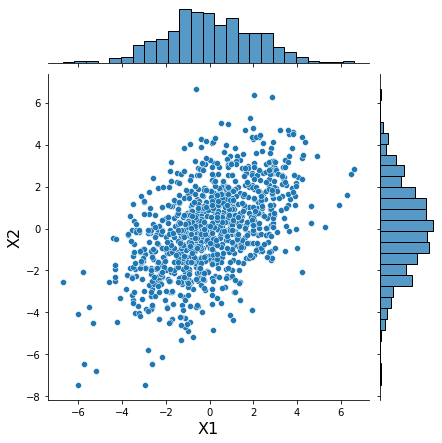

In [3]:
generator = syn.CopulaDataGenerator()

parameterizer = syn.QuantileParameterizer(n_quantiles=100)

generator.fit(data, copula=syn.GaussianCopula(), parameterize_by=parameterizer)

samples = generator.generate(n_samples=N_SAMPLES, uniformization_ratio=0, stretch_factor=2)

h = sns.jointplot(samples[:, 0], samples[:, 1], kind='scatter')
h.set_axis_labels('X1', 'X2', fontsize=16);

## Fit a Gaussian copula with pyvinecopulib's backend

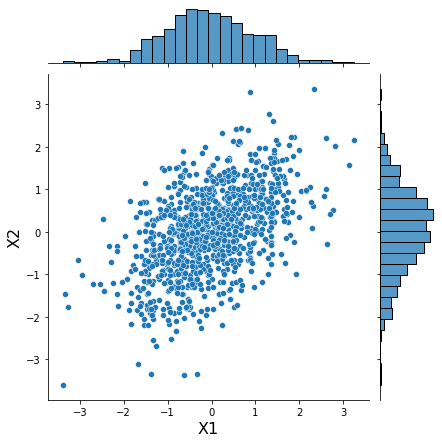

In [4]:
generator = syn.CopulaDataGenerator()

parameterizer = syn.QuantileParameterizer(n_quantiles=100)

ctrl = pv.FitControlsVinecop(family_set=[pv.BicopFamily.gaussian], select_trunc_lvl=True)
generator.fit(data, copula=syn.VineCopula(controls=ctrl), parameterize_by=parameterizer)

samples = generator.generate(n_samples=N_SAMPLES)

h = sns.jointplot(samples[:, 0], samples[:, 1], kind='scatter')
h.set_axis_labels('X1', 'X2', fontsize=16);